# 2-Point Statistics Example: Steel Microstructure

This page is an example of how to obtain 2-point statistics using PyMKS tools. The workflow is the following: import image dataset from PyMKS database, display the images in the dataset, threshold the images if necessary, and calculate 2-point statistics for the images.

Since sometimes images are very large, and we want to crop them to reduce the effort of computing the 2-point statistics. We will explore how the 2-point statistics compare between full image and cropped image, also at different magnifications.

The dataset that we are importing is optical micrographs of chemically etched low carbon steel. It is etched to display some features of the microstructure, which otherwise would not be visible.


First we are going to import the image dataset from the PyMKS database.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from pymks_share import DataManager
manager = DataManager ('pymks.me.gatech.edu')
X = manager.fetch_data('Etched Low Carbon Steel Optical Micrographs')
meta= manager.fetch_metadata('Etched Low Carbon Steel Optical Micrographs')
meta
print 'Data Dimensions', X.shape  #display dimensions of X

Data Dimensions (7L, 1040L, 1388L)


Note that we have 7 images at 1040x1388 pixels each.

Now, we will display the images using the PyMKS 'draw_microstructure' tool.

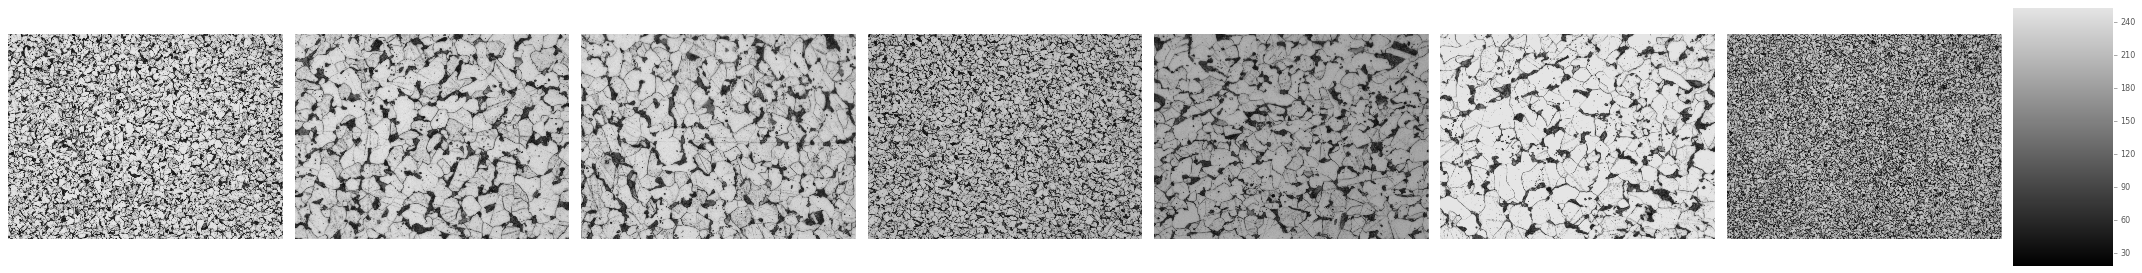

In [3]:
import skimage.io as io
import matplotlib.pylab as plt
import numpy as np
from pymks.tools import draw_microstructures

draw_microstructures(X)

The images were taken at different magnifications, 100x, 500x, 500x, 100x, 200x, 500x, and 50x. Although the images were  obtained using the same equipment, there are some variations in brightness, contrast, exposure, etc., to account for variation in image collection process.

The images are in grayscale. We need to make them black and white, since we know that there are only two different particles in the microstructure. We do this by thresholding the image using Otsu's method. By thresholding, each pixel in the image will become either black or white (2 states).

In [4]:
from skimage.filters import threshold_otsu

samples = len(X)
X_binary = np.ndarray(shape=(samples,X.shape[1],X.shape[2]))
X_binary.shape
i=0
for x in X:
    x_thresh = threshold_otsu(x)
    X_binary[i] = x > x_thresh
    i += 1

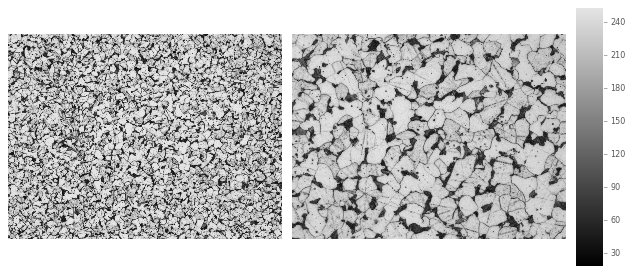

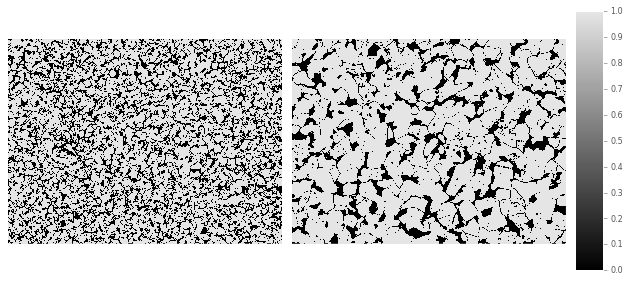

In [5]:
draw_microstructures(X[0:2,:,:])
draw_microstructures(X_binary[0:2,:,:])

We plotted two original images at 100x (top left) and 500x (top right) to compare with their thresholded image (bottom). The original images have 256 shades of gray and the thresholded images has only two shades, 0 or 1, seen in the scale bar.

We can see that the original images clearly show grain boundaries, whereas the thresholded image has removed some of the grain boundaries from the image, better seen in the 500x image (bottom right).

Now we are going to compute correlations using PyMKS 'correlate' tool, which computes auto- and cross-correlations for all phases in the microstructure. We have 2 phases in our microstructure ('n_states=2').

In [6]:
from pymks.stats import correlate
from pymks import PrimitiveBasis

prim_basis = PrimitiveBasis(n_states=2)
X_ = prim_basis.discretize(X_binary)
X_corr = correlate(X_, periodic_axes=(0,1))
print "Shape of X_corr", X_corr.shape

Shape of X_corr (7L, 1040L, 1388L, 3L)


After computing the correlations we have three correlation results for each of our 7 microstructures. Note that the shape of the correlation plot is the same as the original image.

We will plot the 2-point statistics below. 

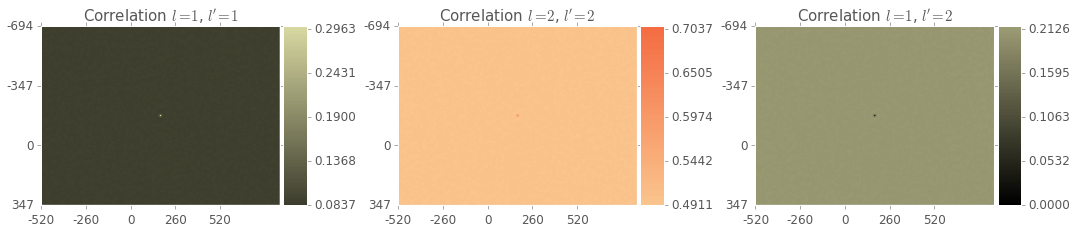

Volume fraction of black phase 0.296297235738
Volume fraction of white phase 0.703702730905


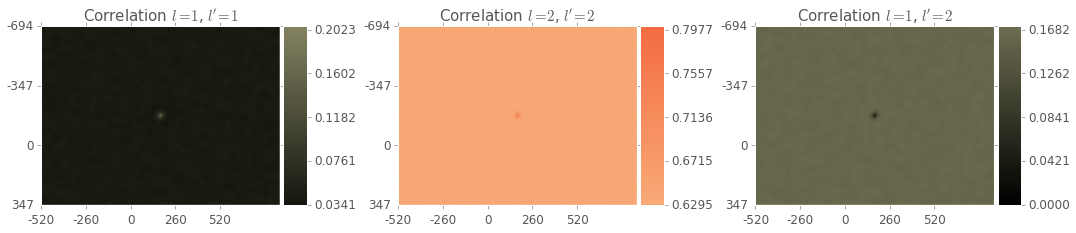

Volume fraction of black phase 0.202279836968
Volume fraction of white phase 0.797720129675


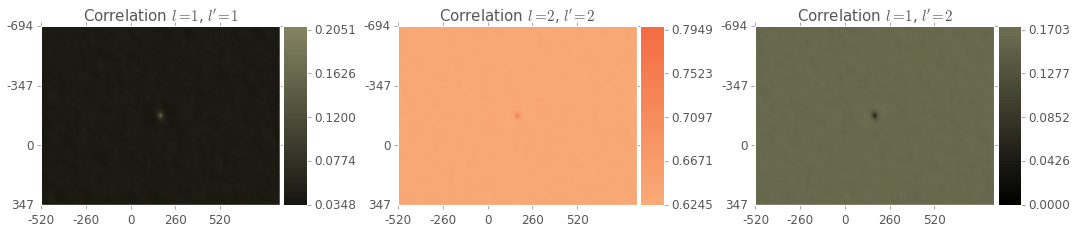

Volume fraction of black phase 0.205145055228
Volume fraction of white phase 0.794854911416


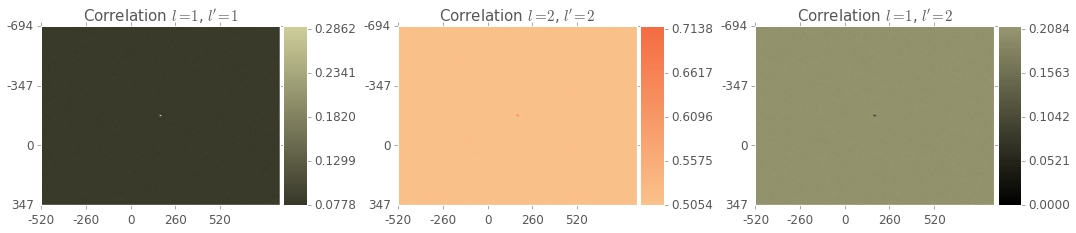

Volume fraction of black phase 0.286194154719
Volume fraction of white phase 0.713805811925


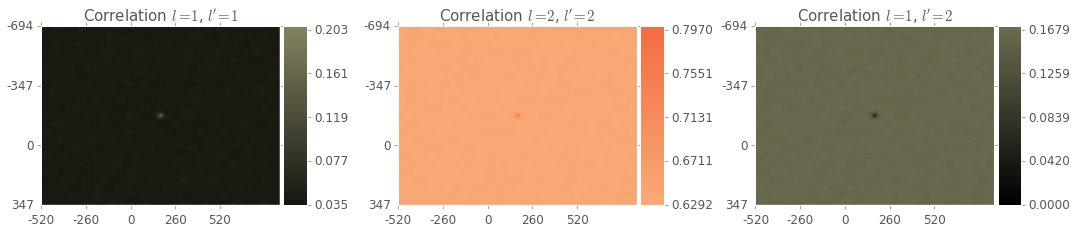

Volume fraction of black phase 0.202951805467
Volume fraction of white phase 0.797048161176


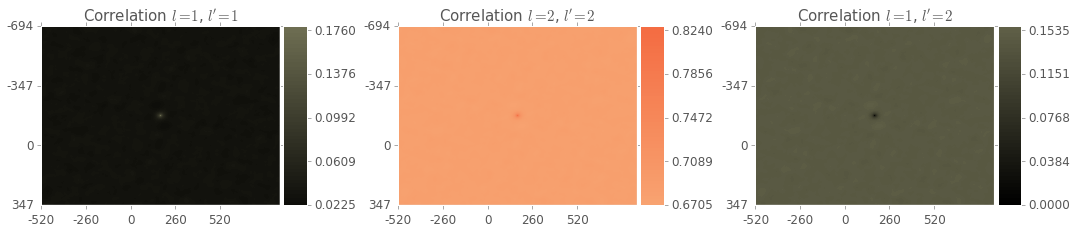

Volume fraction of black phase 0.176005868658
Volume fraction of white phase 0.823994097985


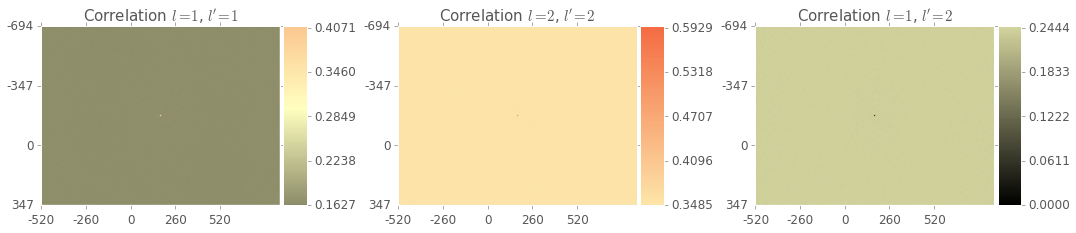

Volume fraction of black phase 0.40709167895
Volume fraction of white phase 0.592908287693


In [7]:
from pymks.tools import draw_correlations

for i in range(samples):
    draw_correlations(X_corr[i], correlations=[(1, 1), (2, 2), (1, 2)])
    x_center = (X_corr.shape[1] + 1) / 2
    y_center = (X_corr.shape[2] + 1) / 2
    print 'Volume fraction of black phase', X_corr[i, x_center, y_center, 0]
    print 'Volume fraction of white phase', X_corr[i, x_center, y_center, 1]

The above plots indicate the states on which the 2-point statistics have been calculated (black-black, white-white, black-white). In this case, the black phase is labelled as 1 and white phase as 2. The grain pattern in the original images seem random and the grain shapes are different. From the correlation plots, we cannot tell any microstructure features or patterns that clearly stand out. 

We can focus on the volume fractions for each image. For images at highest magnification (500x) the volume fraction of the black phase is minimum at 17.6%, and at lowest magnification (50x), it is 40.7%. 

The difference in volume fraction is because the lower magnification images retained a higher amount of grain boundary information in the image after thresholding. Grain boundary information is not desirable since it is not part of a particular phase. A grain boundary can separate two phases that appear white, and the statistics treat the grain boundary as a black phase, which will not be accurate.

Since we see a lot less grain boundaries in the higher magnification images (500x), these images are more reliable for computing 2-point statistics. The images with 500x show a volume fraction of black phase of 20.2%, 20.5%, an 17.6%. The image of 200x shows a volume fraction of 20.3%, which is in agreement with the statistics of 500x images. 

The volume fractions vary slightly in 200x and 500x images, which is expected since the images were taken at different locations. However, the etched images at higher magnification are more reliable for 2-statistics since they do include as much grain boundary information as the lower magnification images.

# 2-Point Statistics on Cropped Images
Now we are going to crop the image to the first 400 pixels in horizontal and vertical directions and repeat the process of computing the 2-point statistics. Out new images are going to be 400x400 pixels.

Shape of X (7L, 400L, 400L)


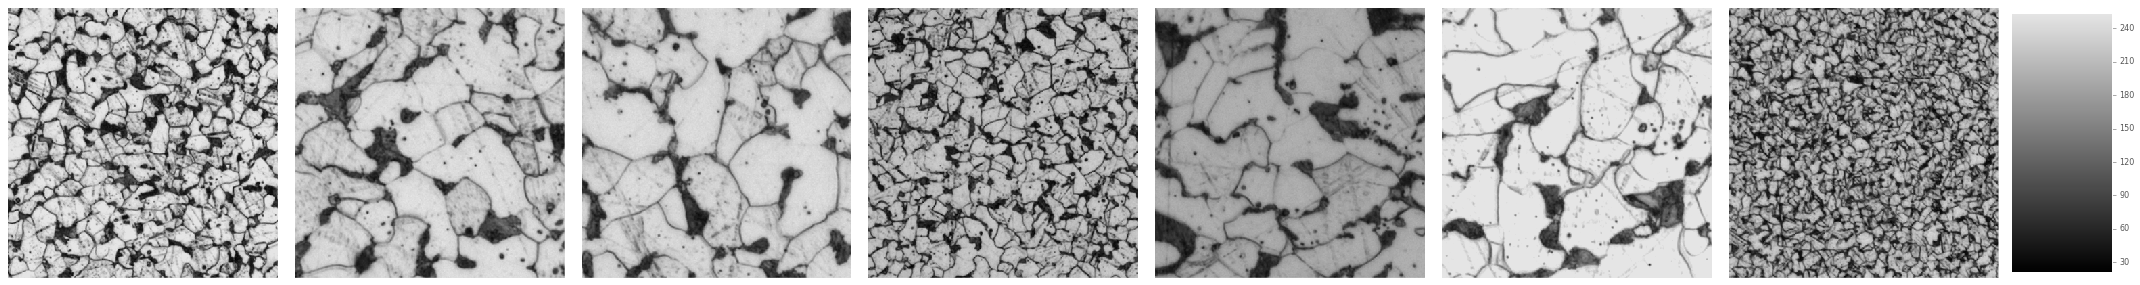

In [8]:
X = X[:,0:400,0:400]
print 'Shape of X', X.shape
draw_microstructures(X)

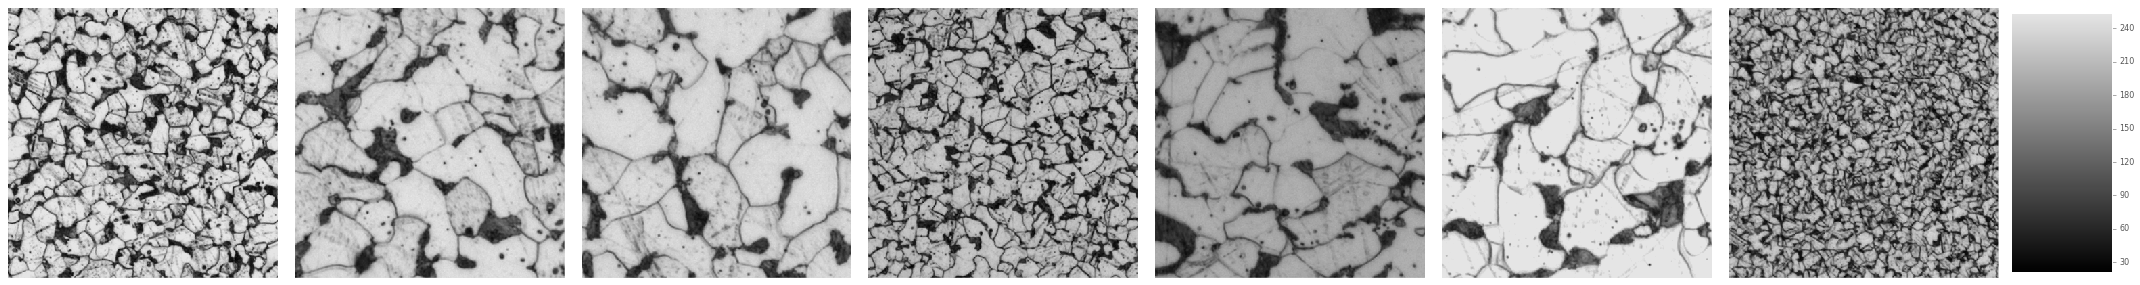

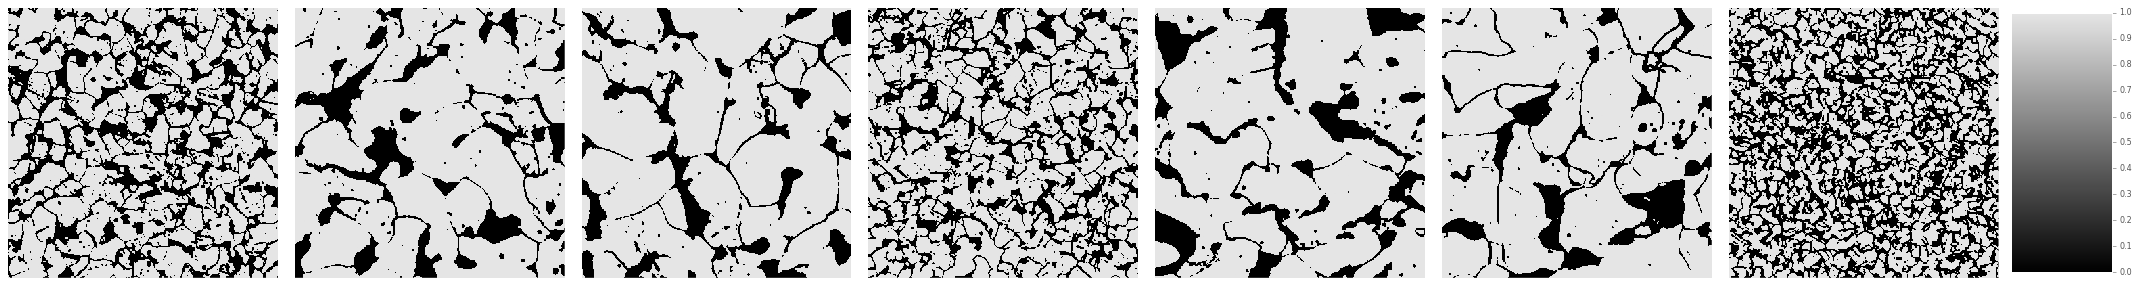

In [9]:
samples = len(X)
X_binary = np.ndarray(shape=(samples,X.shape[1],X.shape[2]))
X_binary.shape
i=0
for x in X:
    x_thresh = threshold_otsu(x)
    X_binary[i] = x > x_thresh
    i += 1
    
draw_microstructures(X)
draw_microstructures(X_binary)

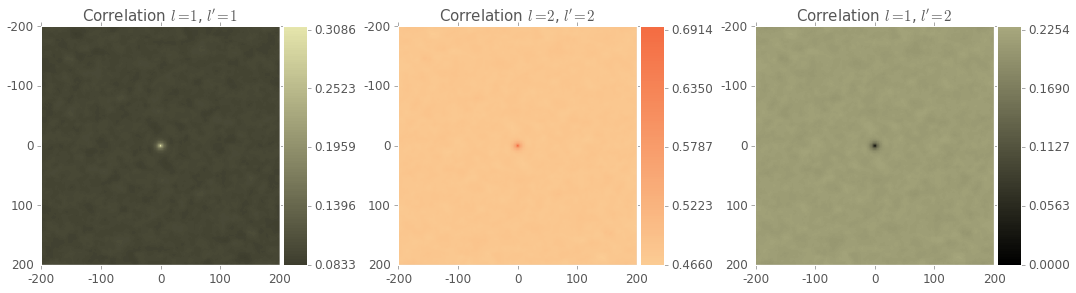

Volume fraction of black phase 0.308631242203
Volume fraction of white phase 0.691368732535


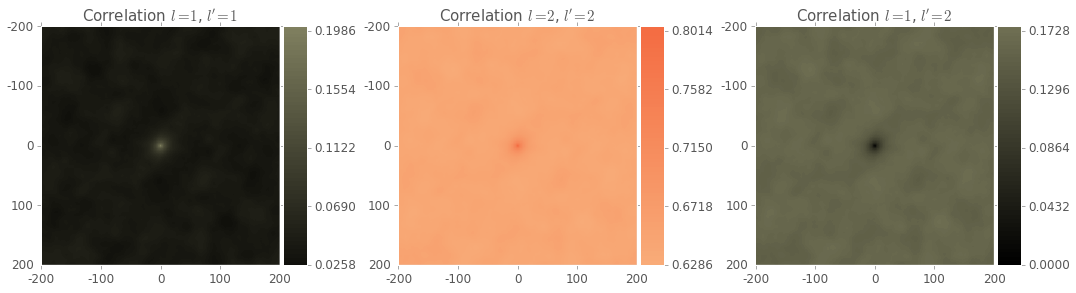

Volume fraction of black phase 0.198587494983
Volume fraction of white phase 0.801412479755


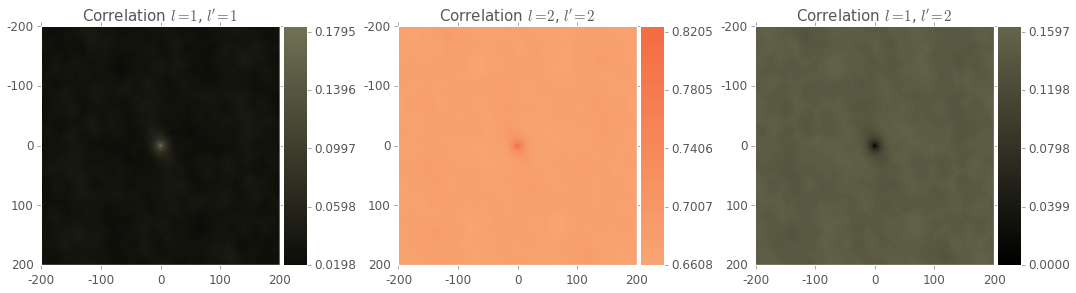

Volume fraction of black phase 0.179537495465
Volume fraction of white phase 0.820462479273


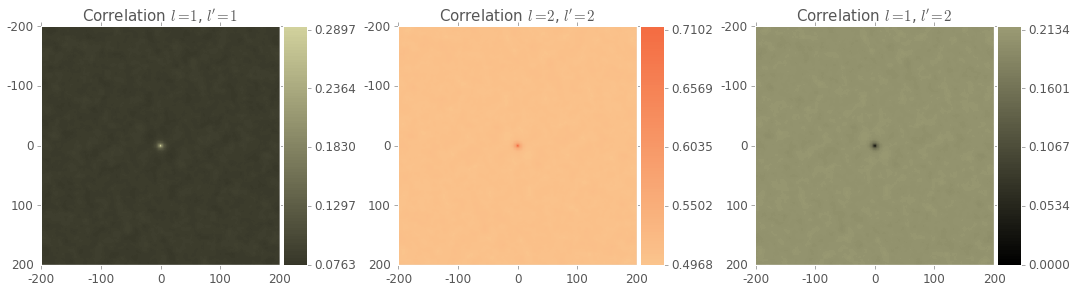

Volume fraction of black phase 0.28974999268
Volume fraction of white phase 0.710249982058


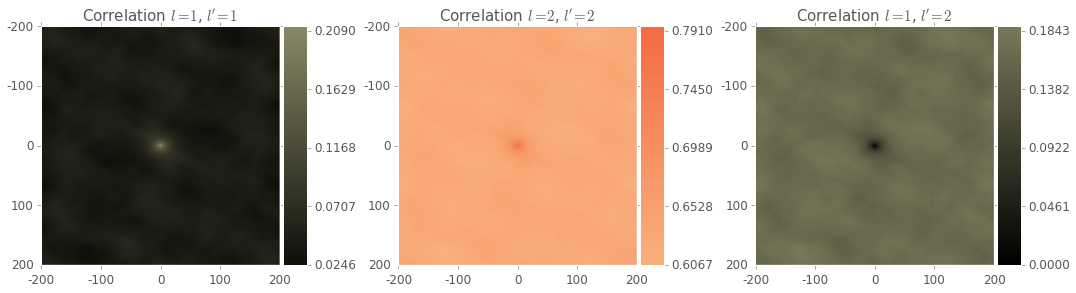

Volume fraction of black phase 0.208956244721
Volume fraction of white phase 0.791043730017


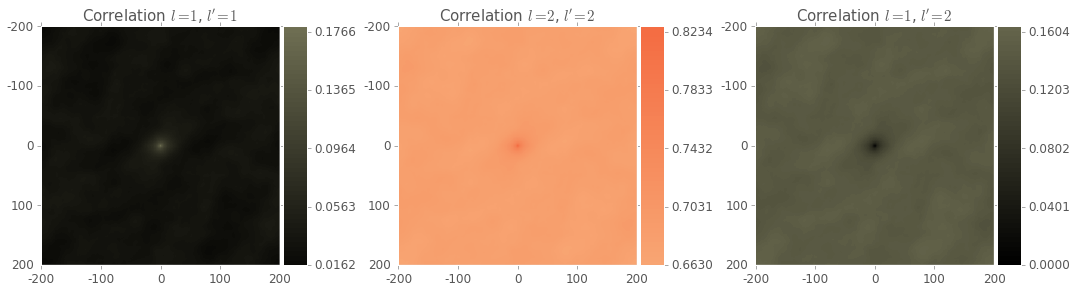

Volume fraction of black phase 0.176587495539
Volume fraction of white phase 0.823412479199


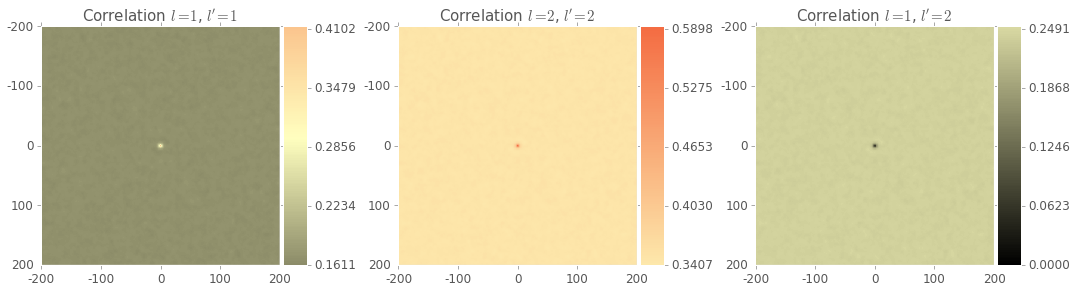

Volume fraction of black phase 0.410187489638
Volume fraction of white phase 0.5898124851


In [10]:
prim_basis = PrimitiveBasis(n_states=2)
X_ = prim_basis.discretize(X_binary)
X_corr = correlate(X_, periodic_axes=(0,1))

for i in range(samples):
    draw_correlations(X_corr[i], correlations=[(1, 1), (2, 2), (1, 2)])
    x_center = (X_corr.shape[1] + 1) / 2
    y_center = (X_corr.shape[2] + 1) / 2
    print 'Volume fraction of black phase', X_corr[i, x_center, y_center, 0]
    print 'Volume fraction of white phase', X_corr[i, x_center, y_center, 1]

We have computed the 2-point statistics for the cropped images. If we compare the volume fractions for each image, we can see that they are very close to the volume fractions of the original resolution images, within 5% difference, except for the third image (13%).

At higher resolution images (500x) we can now better observe the distribution of the black and white phases. For example, in 2-point statistics result for sixth image, we can see the distribution of the black phase in a diagonal direction. It is not so evident for lower magnification images.

We now have more meaningful 2-point statistics plots for the cropped images at higher magnifications (200x, 500x). However, for lower magnification images we do not yet have insightful spatial correlations. To improve the spatial statistics for 50x and 100x, we can crop the images further, which will approximately match the view field of the higher magnification images.

Spatial correlations are a more rigorous way to analyze microstructure images rather than using intuition and expertise. It is important to have an image with a view field that is representative of the whole microstructure for 2-point statistics computations. Once two point statistics have been computed for a dataset, the spatial correlations can by further analyzed using principal component analysis (PCA).